In [2]:
import keras
print(keras.__version__)
import tensorflow as tf
print(tf.__version__)

2.12.0
2.12.0


In [3]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import InputLayer
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

from tensorflow.keras.applications.resnet50 import ResNet50

In [4]:
os.listdir('mask_dataset') # List all files and folders in the 'mask_dataset' directory

['0', '1']

In [5]:
# Function to assign a label to each image
def assign_label(img,label):
    return label

In [6]:
# Function to create training data from the given directory
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [7]:
# Initialize empty lists for storing image data and labels
X=[]
Z=[]

# Set the size of the images
IMG_SIZE=150

# Specify the directories for images with and without masks
NOMASK='mask_dataset/0'
MASK='mask_dataset/1'

# Create training data for both labels
make_train_data('NOMASK',NOMASK)
make_train_data('MASK',MASK)

100%|███████████████████████████████████████████████████████████████████████████████| 499/499 [00:00<00:00, 782.83it/s]


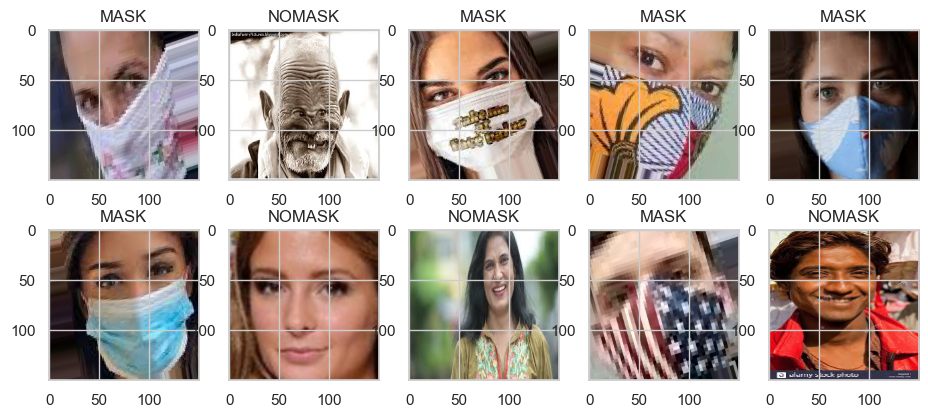

In [8]:
# Plot sample images in a 2x5 grid
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(10,10)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

In [9]:
# Encode the labels as numerical values
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)

# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1337)

# Set the random seeds for reproducibility
np.random.seed(42)
rn.seed(42)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [10]:
# Create the base model using ResNet50
base_model=ResNet50(include_top=False, weights='imagenet',input_shape=(150,150,3), pooling='max')
base_model.summary()

94765736/94765736 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 38, 38, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 38, 38, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 38, 38, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 19, 19, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 19, 19, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 19, 19, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_blo

 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 10, 10, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_blo

 conv4_block5_1_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 10, 10, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 10, 10, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_block5_2_bn (BatchNormal  (None, 10, 10, 256)  1024       ['conv4_block5_2_conv[0][0]']    
 ization)                                                                                         
          

 conv5_block1_out (Activation)  (None, 5, 5, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 5, 5, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 5, 5, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 5, 5, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_blo

In [11]:
# Create the final model
model=Sequential()
model.add(base_model)
model.add(Dropout(0.20))
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [12]:
# Set the training parameters
epochs=100
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=0.0001, patience=2, verbose=1)
base_model.trainable=True # Make the base model trainable
model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 30,408,066
Trainable params: 30,354,946
No

In [13]:
# Train the model
History = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/100
26/26 [==============================] - 51s 2s/step - loss: 0.6862 - accuracy: 0.7545 - val_loss: 0.3342 - val_accuracy: 0.8768
Epoch 2/100
26/26 [==============================] - 53s 2s/step - loss: 0.1545 - accuracy: 0.9407 - val_loss: 0.2499 - val_accuracy: 0.9130
Epoch 3/100
26/26 [==============================] - 59s 2s/step - loss: 0.0667 - accuracy: 0.9782 - val_loss: 0.1628 - val_accuracy: 0.9420
Epoch 4/100
26/26 [==============================] - 61s 2s/step - loss: 0.0433 - accuracy: 0.9891 - val_loss: 0.1515 - val_accuracy: 0.9384
Epoch 5/100
26/26 [==============================] - 62s 2s/step - loss: 0.0405 - accuracy: 0.9831 - val_loss: 0.1126 - val_accuracy: 0.9638
Epoch 6/100
26/26 [==============================] - 62s 2s/step - loss: 0.0131 - accuracy: 0.9976 - val_loss: 0.1200 - val_accuracy: 0.9493
Epoch 7/100
26/26 [==============================] - 66s 3s/step - loss: 0.0244 - accuracy: 0.9891 - val_loss: 0.1152 - val_accuracy: 0.9638
Epoch 8/100
2

In [14]:
model.save('model2.h5') # Save the trained model

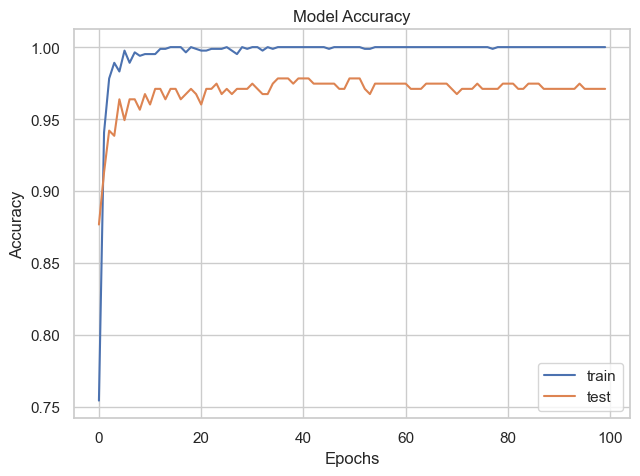

In [15]:
# Plot the accuracy of the model during training
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

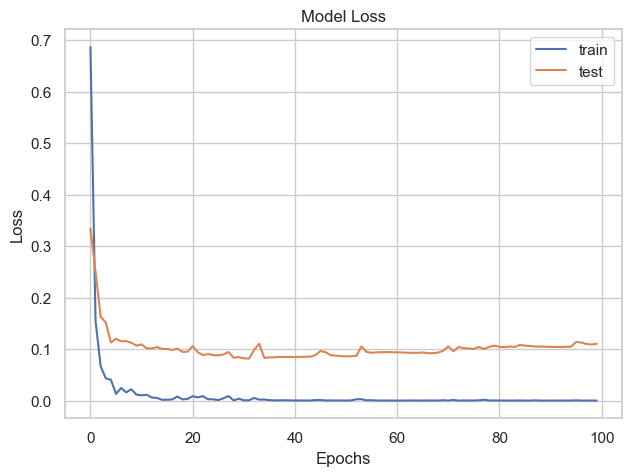

In [16]:
# Plot the loss of the model during training
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### Test the trained model on new images from the "mask_dataset/1" and "mask_dataset/0" directories, representing people wearing masks and people not wearing masks, respectively. For each image, the model's prediction is outputted as rounded numpy array.

In [17]:
# Test the model on images with masks
path="mask_dataset/1/"
files=os.listdir(path)
for i in files:
    X=cv2.imread(path+i)
    X=cv2.resize(X,(150,150))

    X = np.array(X)
    X = np.expand_dims(X, axis=0)

    print(np.round(model.predict(X)))

1/1 [==============================] - 3s 3s/step
[[1. 0.]]
1/1 [==============================] - 0s 68ms/step
[[1. 0.]]
1/1 [==============================] - 0s 58ms/step
[[1. 0.]]
1/1 [==============================] - 0s 67ms/step
[[1. 0.]]
1/1 [==============================] - 0s 79ms/step
[[1. 0.]]
1/1 [==============================] - 0s 70ms/step
[[1. 0.]]
1/1 [==============================] - 0s 61ms/step
[[1. 0.]]
1/1 [==============================] - 0s 78ms/step
[[1. 0.]]
1/1 [==============================] - 0s 75ms/step
[[1. 0.]]
1/1 [==============================] - 0s 70ms/step
[[1. 0.]]
1/1 [==============================] - 0s 65ms/step
[[1. 0.]]
1/1 [==============================] - 0s 69ms/step
[[1. 0.]]
1/1 [==============================] - 0s 76ms/step
[[1. 0.]]
1/1 [==============================] - 0s 60ms/step
[[1. 0.]]
1/1 [==============================] - 0s 68ms/step
[[1. 0.]]
1/1 [==============================] - 0s 60ms/step
[[1. 0.]]
1/1 [=====

1/1 [==============================] - 0s 58ms/step
[[1. 0.]]
1/1 [==============================] - 0s 78ms/step
[[1. 0.]]
1/1 [==============================] - 0s 64ms/step
[[1. 0.]]
1/1 [==============================] - 0s 71ms/step
[[1. 0.]]
1/1 [==============================] - 0s 66ms/step
[[1. 0.]]
1/1 [==============================] - 0s 62ms/step
[[1. 0.]]
1/1 [==============================] - 0s 74ms/step
[[1. 0.]]
1/1 [==============================] - 0s 70ms/step
[[1. 0.]]
1/1 [==============================] - 0s 61ms/step
[[1. 0.]]
1/1 [==============================] - 0s 67ms/step
[[1. 0.]]
1/1 [==============================] - 0s 62ms/step
[[1. 0.]]
1/1 [==============================] - 0s 80ms/step
[[1. 0.]]
1/1 [==============================] - 0s 62ms/step
[[1. 0.]]
1/1 [==============================] - 0s 60ms/step
[[1. 0.]]
1/1 [==============================] - 0s 58ms/step
[[1. 0.]]
1/1 [==============================] - 0s 69ms/step
[[1. 0.]]
1/1 [===

In [18]:
# Test the model on images without masks
path="mask_dataset/0/"
files=os.listdir(path)
for i in files:
    X=cv2.imread(path+i)
    X=cv2.resize(X,(150,150))

    X = np.array(X)

    X = np.expand_dims(X, axis=0)

    print(np.round(model.predict(X))) 

1/1 [==============================] - 0s 59ms/step
[[0. 1.]]
1/1 [==============================] - 0s 72ms/step
[[0. 1.]]
1/1 [==============================] - 0s 69ms/step
[[0. 1.]]
1/1 [==============================] - 0s 56ms/step
[[0. 1.]]
1/1 [==============================] - 0s 65ms/step
[[0. 1.]]
1/1 [==============================] - 0s 68ms/step
[[0. 1.]]
1/1 [==============================] - 0s 65ms/step
[[0. 1.]]
1/1 [==============================] - 0s 65ms/step
[[0. 1.]]
1/1 [==============================] - 0s 64ms/step
[[0. 1.]]
1/1 [==============================] - 0s 58ms/step
[[0. 1.]]
1/1 [==============================] - 0s 63ms/step
[[0. 1.]]
1/1 [==============================] - 0s 65ms/step
[[0. 1.]]
1/1 [==============================] - 0s 60ms/step
[[1. 0.]]
1/1 [==============================] - 0s 55ms/step
[[0. 1.]]
1/1 [==============================] - 0s 65ms/step
[[0. 1.]]
1/1 [==============================] - 0s 63ms/step
[[0. 1.]]
1/1 [===

1/1 [==============================] - 0s 68ms/step
[[0. 1.]]
1/1 [==============================] - 0s 68ms/step
[[0. 1.]]
1/1 [==============================] - 0s 70ms/step
[[0. 1.]]
1/1 [==============================] - 0s 61ms/step
[[0. 1.]]
1/1 [==============================] - 0s 62ms/step
[[0. 1.]]
1/1 [==============================] - 0s 71ms/step
[[0. 1.]]
1/1 [==============================] - 0s 69ms/step
[[0. 1.]]
1/1 [==============================] - 0s 61ms/step
[[0. 1.]]
1/1 [==============================] - 0s 70ms/step
[[0. 1.]]
1/1 [==============================] - 0s 74ms/step
[[0. 1.]]
1/1 [==============================] - 0s 64ms/step
[[0. 1.]]
1/1 [==============================] - 0s 60ms/step
[[0. 1.]]
1/1 [==============================] - 0s 69ms/step
[[0. 1.]]
1/1 [==============================] - 0s 62ms/step
[[0. 1.]]
1/1 [==============================] - 0s 65ms/step
[[0. 1.]]
1/1 [==============================] - 0s 62ms/step
[[0. 1.]]
1/1 [===

1/1 [==============================] - 0s 73ms/step
[[0. 1.]]
1/1 [==============================] - 0s 68ms/step
[[0. 1.]]
1/1 [==============================] - 0s 64ms/step
[[0. 1.]]
1/1 [==============================] - 0s 68ms/step
[[0. 1.]]
1/1 [==============================] - 0s 70ms/step
[[0. 1.]]
1/1 [==============================] - 0s 64ms/step
[[0. 1.]]
1/1 [==============================] - 0s 56ms/step
[[0. 1.]]
1/1 [==============================] - 0s 62ms/step
[[0. 1.]]
1/1 [==============================] - 0s 63ms/step
[[0. 1.]]
1/1 [==============================] - 0s 65ms/step
[[0. 1.]]
1/1 [==============================] - 0s 57ms/step
[[0. 1.]]
1/1 [==============================] - 0s 62ms/step
[[0. 1.]]
1/1 [==============================] - 0s 63ms/step
[[0. 1.]]
1/1 [==============================] - 0s 68ms/step
[[0. 1.]]
1/1 [==============================] - 0s 61ms/step
[[0. 1.]]
1/1 [==============================] - 0s 64ms/step
[[0. 1.]]
1/1 [===